In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import json
from scipy.stats import linregress

In [4]:
deaths_case="Death Rates by State 2020 No Total & Unknown.csv"
cdc_read=pd.read_csv(deaths_case, low_memory=False)
cdc_read

,State,Covid Deaths,Deaths from All Causes,Deaths from All Causes Except Covid,Est Population 2019,Est Population 2020,Covid Death Rate (Est 2019 Pop),All Deaths Rate (Est 2019 Pop),All Deaths Except Covid Death Rate (Est 2019 Pop),Covid Death Rate (Est 2020 Pop),All Deaths Rate (Est 2020 Pop),All Deaths Except Covid Death Rate (Est 2020 Pop)
0,.Alabama,3174,36648,33474,"4,903,185","4,923,185",0.000647,0.007474,0.006827,0.000645,0.007444,0.006799
1,.Alaska,39,1612,1573,"731,545","733,545",0.000053,0.002204,0.002150,0.000053,0.002198,0.002144
2,.Arizona,4984,48965,43981,"7,278,717","7,378,717",0.000685,0.006727,0.006042,0.000675,0.006636,0.005961
3,.Arkansas,1043,16163,15120,"3,017,804","3,217,804",0.000346,0.005356,0.005010,0.000324,0.005023,0.004699
4,.California,14923,191001,176078,"39,512,223","39,542,223",0.000378,0.004834,0.004456,0.000377,0.004830,0.004453
5,.Colorado,1904,26167,24263,"5,758,736","5,808,736",0.000331,0.004544,0.004213,0.000328,0.004505,0.004177
6,.Connecticut,4410,22253,17843,"3,565,287","3,595,287",0.001237,0.006242,0.005005,0.001227,0.006189,0.004963
7,.Delaware,563,6660,6097,"973,764","977,764",0.000578,0.006839,0.006261,0.000576,0.006811,0.006236
8,.District of Columbia,756,4805,4049,"705,749","707,749",0.001071,0.006808,0.005737,0.001068,0.006789,0.005721
9,.Florida,14302,155932,141630,"21,477,737","21,877,737",0.000666,0.007260,0.006594,0.000654,0.007127,0.006474


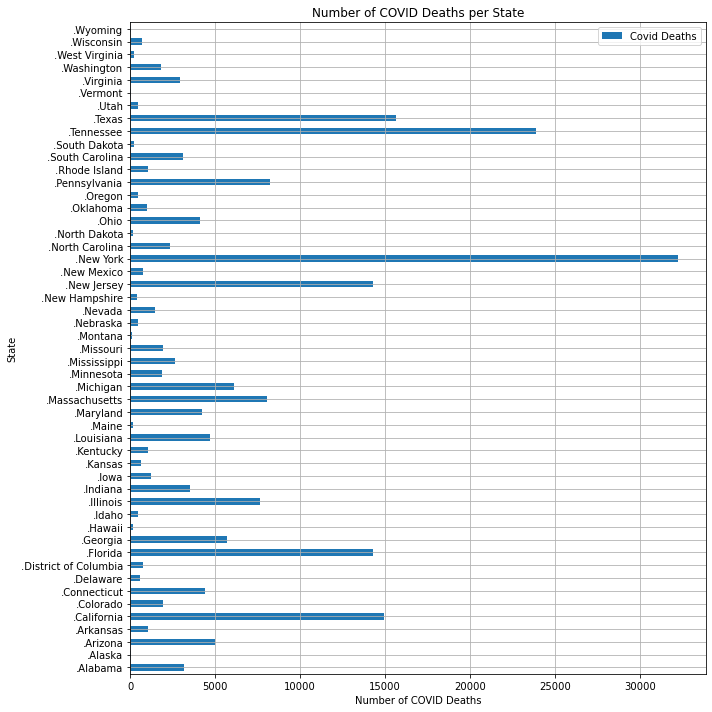

In [5]:
cdc_read.plot(x='State', 
                y='Covid Deaths', 
                kind='barh', 
                figsize=(10,10), 
                title='Number of COVID Deaths per State', 
                grid=True, 
                fontsize=10, 
                sort_columns=True)
plt.xlabel('Number of COVID Deaths')
plt.tight_layout()
plt.savefig("Number of Covid Deaths per State BarH.png")
plt.show()

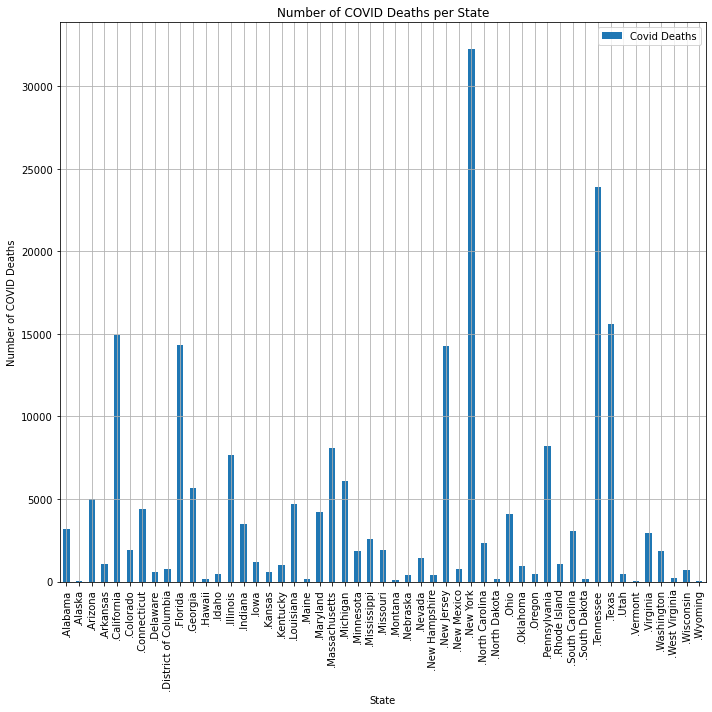

In [6]:
cdc_read.plot(x='State', 
                y='Covid Deaths', 
                kind='bar', 
                figsize=(10,10), 
                title='Number of COVID Deaths per State', 
                grid=True, 
                fontsize=10, 
                sort_columns=True)
plt.ylabel('Number of COVID Deaths')
plt.tight_layout()
plt.savefig("Number of Covid Deaths per State Bar.png")
plt.show()

In [8]:
# cdc_read.plot(x='State', 
#                 y='Covid Deaths', 
#                 kind='line', 
#                 figsize=(10,10), 
#                 title='Number of COVID Deaths per State', 
#                 grid=True, 
#                 fontsize=10, 
#                 sort_columns=True)
# plt.ylabel('Number of COVID Deaths')
# plt.tight_layout()
# plt.savefig("Number of Covid Deaths per State Line.png")
# plt.show()

In [10]:
# labels= ['Alabama',
# 'Alaska',
# 'Arizona',
# 'Arkansas',
# 'California',
# 'Colorado',
# 'Connecticut',
# 'Delaware',
# 'District of Columbia',
# 'Florida',
# 'Georgia',
# 'Hawaii',
# 'Idaho',
# 'Illinois',
# 'Indiana',
# 'Iowa',
# 'Kansas',
# 'Kentucky',
# 'Louisiana',
# 'Maine',
# 'Maryland',
# 'Massachusetts',
# 'Michigan',
# 'Minnesota',
# 'Mississippi',
# 'Missouri',
# 'Montana',
# 'Nebraska',
# 'Nevada',
# 'New Hampshire',
# 'New Jersey',
# 'New Mexico',
# 'New York',
# 'North Carolina',
# 'North Dakota',
# 'Ohio',
# 'Oklahoma',
# 'Oregon',
# 'Pennsylvania',
# 'Rhode Island',
# 'South Carolina',
# 'South Dakota',
# 'Tennessee',
# 'Texas',
# 'Utah',
# 'Vermont',
# 'Virginia',
# 'Washington',
# 'West Virginia',
# 'Wisconsin',
# 'Wyoming']
         
# sizes=[3174
# ,39
# ,4984
# ,1043
# ,14923
# ,1904
# ,4410
# ,563
# ,756
# ,14302
# ,5695
# ,150
# ,431
# ,7649
# ,3483
# ,1199
# ,600
# ,1028
# ,4674
# ,139
# ,4222
# ,8060
# ,6095
# ,1868
# ,2595
# ,1903
# ,108
# ,421
# ,1433
# ,400
# ,14297
# ,762
# ,32259
# ,2331
# ,178
# ,4099
# ,947
# ,469
# ,8236
# ,1045
# ,3078
# ,182
# ,23896
# ,15627
# ,447
# ,49
# ,2940
# ,1827
# ,200
# ,703
# ,10
# ]         

# explode = (0.5, 0.5,0.5, 0.5, 0.5, 0.5,0.5, 0.5, 0.5, 0.5,0.5, 0.5, 0.5, 0.5,0.5, 0.5, 0.5, 0.5,0.5, 0.5, 0.5, 0.5,0.5, 0.5, 0.5, 0.5,0.5, 0.5, 0.5, 0.5,0.5, 0.5, 0.5, 0.5,0.5,0.5, 0.5, 0.5, 0.5,0.5, 0.5, 0.5, 0.5,0.5, 0.5, 0.5, 0.5,0.5, 0.5, 0.5, 0.5)
# cdc_read.plot(x='State', 
#                 y='Covid Deaths', 
#                 kind='pie', 
#                 figsize=(10,10), 
#                 title='Number of COVID Deaths per State', 
#                 grid=True, 
#                 fontsize=10, 
#                 sort_columns=True, legend=False, labels=labels,
#         autopct="%1.1f%%", shadow=True, startangle=140, explode=explode)
# plt.tight_layout()
# plt.axis("equal")
# # plt.legend(loc="lower right")
# plt.savefig("Number of Covid Deaths per State Pie.png")
# plt.show()



In [ ]:
# state_allcauses = cdc_read[["State","Deaths from All Causes"]]
# state_allcauses

In [ ]:
# state_allcauses["Deaths from All Causes"]=state_allcauses["Deaths from All Causes"].astype(float)


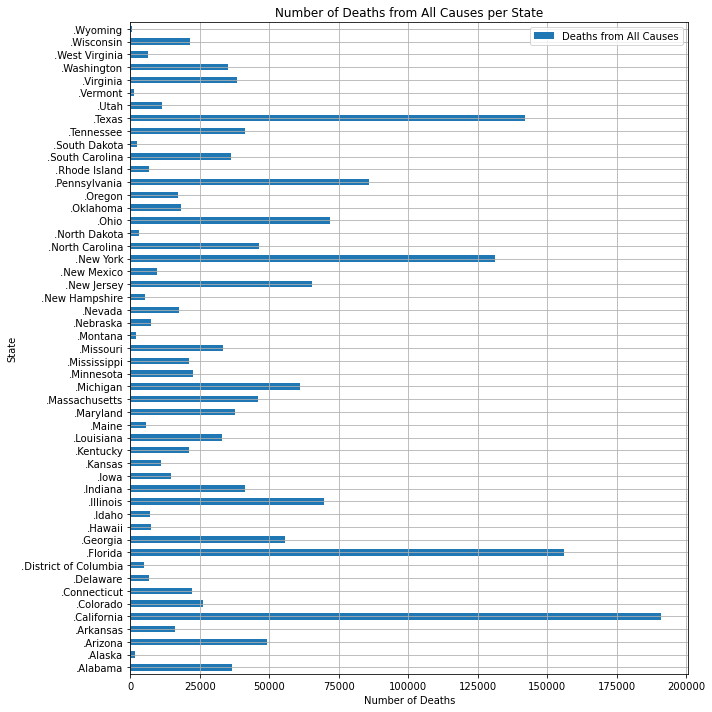

In [11]:
cdc_read.plot(x='State', 
                y='Deaths from All Causes', 
                kind='barh', 
                figsize=(10,10), 
                title='Number of Deaths from All Causes per State', 
                grid=True, 
                fontsize=10, 
                sort_columns=True)
plt.xlabel('Number of Deaths')
plt.tight_layout()
plt.savefig("Number of Deaths from All Causes per State BarH.png")
plt.show()

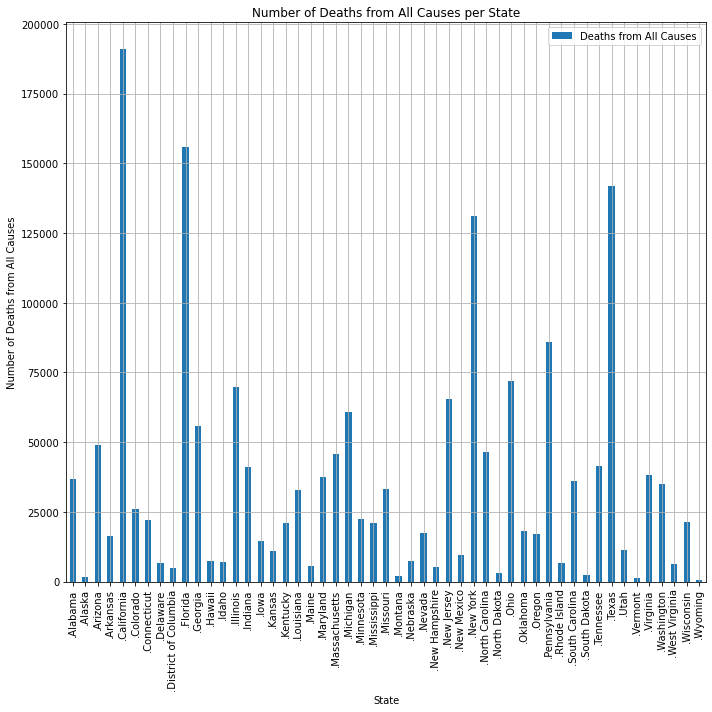

In [12]:
cdc_read.plot(x='State', 
                y='Deaths from All Causes', 
                kind='bar', 
                figsize=(10,10), 
                title='Number of Deaths from All Causes per State', 
                grid=True, 
                fontsize=10, 
                sort_columns=True)
plt.ylabel('Number of Deaths from All Causes')
plt.tight_layout()
plt.savefig("Number of Deaths from All Causes per State Bar.png")
plt.show()

In [14]:
# cdc_read.plot(x='State', 
#                 y='Deaths from All Causes', 
#                 kind='line', 
#                 figsize=(10,10), 
#                 title='Number of Deaths from All Causes per State', 
#                 grid=True, 
#                 fontsize=10, 
#                 sort_columns=True)
# plt.ylabel('Number of Deaths from All Causes')
# plt.tight_layout()
# plt.savefig("Number of Deaths from All Causes per State line.png")
# plt.show()

In [15]:
df2 = cdc_read[["State","Deaths from All Causes","Covid Deaths"]]


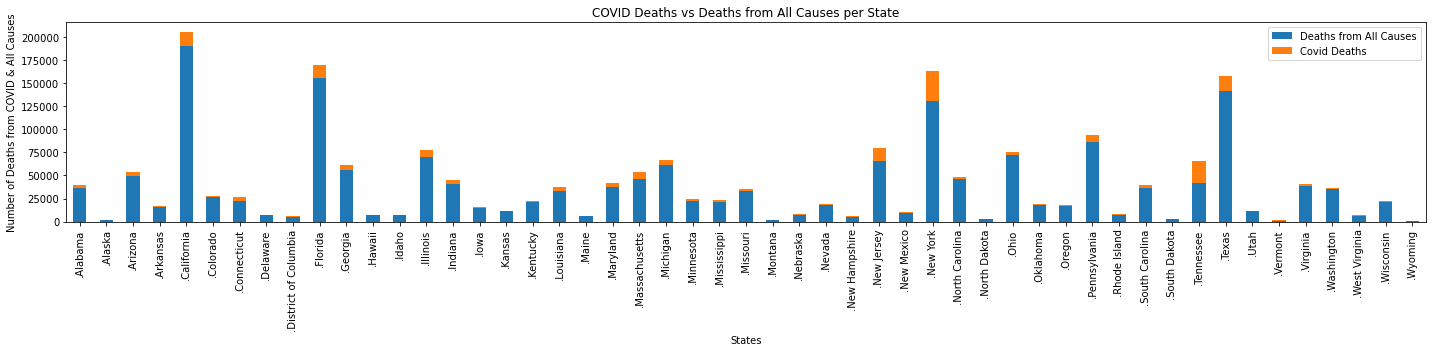

In [16]:
# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = df2.plot(kind="bar", figsize=(20,5), stacked=True)

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(cdc_read["State"], rotation=90)

plt.title('COVID Deaths vs Deaths from All Causes per State')
plt.xlabel('States')
plt.ylabel('Number of Deaths from COVID & All Causes')
plt.tight_layout()
plt.savefig("Number of Deaths from COVID & All Causes per State Stacked Bar.png")
plt.show()



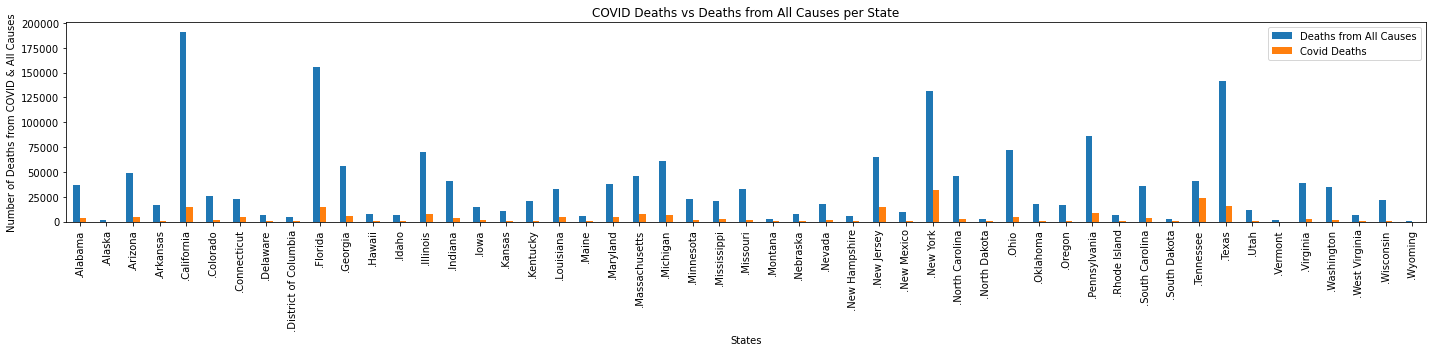

In [17]:
# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = df2.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(cdc_read["State"], rotation=90)

plt.title('COVID Deaths vs Deaths from All Causes per State')
plt.xlabel('States')
plt.ylabel('Number of Deaths from COVID & All Causes')
plt.tight_layout()
plt.savefig("Number of Deaths from COVID & All Causes per State Bar.png")
plt.show()

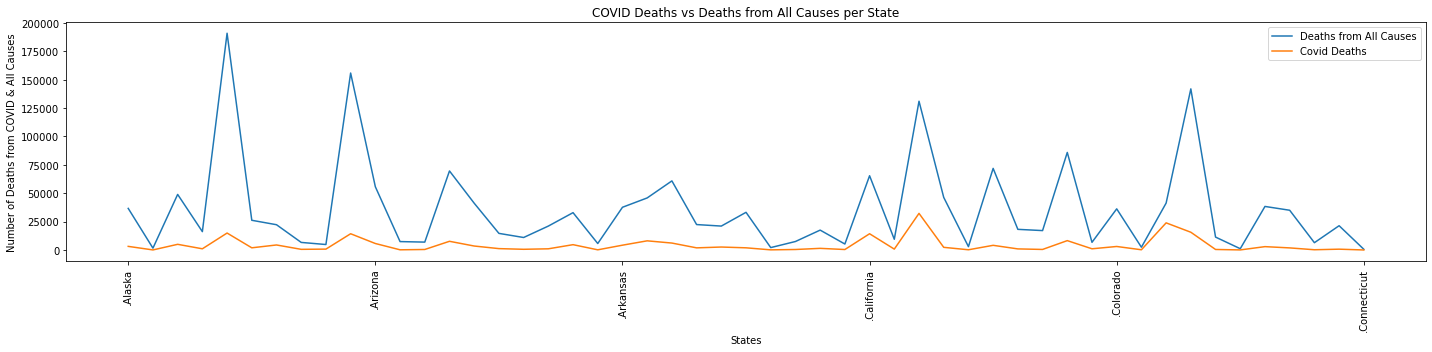

In [18]:
# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = df2.plot(kind="line", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(cdc_read["State"], rotation=90)

plt.title('COVID Deaths vs Deaths from All Causes per State')
plt.xlabel('States')
plt.ylabel('Number of Deaths from COVID & All Causes')
plt.tight_layout()
plt.savefig("Number of Deaths from COVID & All Causes per State Line.png")
plt.show()

In [20]:
df3 = cdc_read[["State","Covid Death Rate (Est 2019 Pop)","All Deaths Rate (Est 2019 Pop)"]]


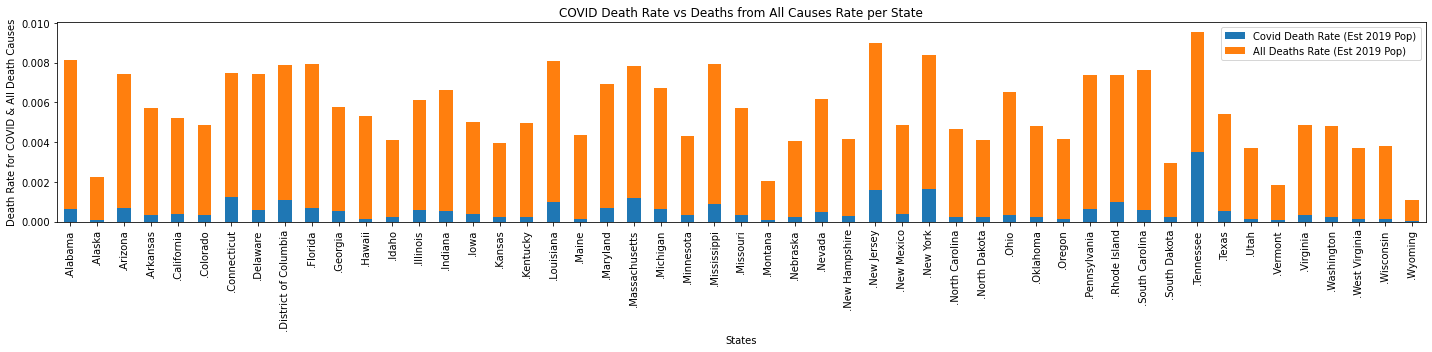

In [21]:
# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = df3.plot(kind="bar", figsize=(20,5), stacked=True)

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(cdc_read["State"], rotation=90)

plt.title('COVID Death Rate vs Deaths from All Causes Rate per State')
plt.xlabel('States')
plt.ylabel('Death Rate for COVID & All Death Causes')
plt.tight_layout()
plt.savefig("Death Rate for COVID & All Causes of Death per State Stacked Bar.png")
plt.show()

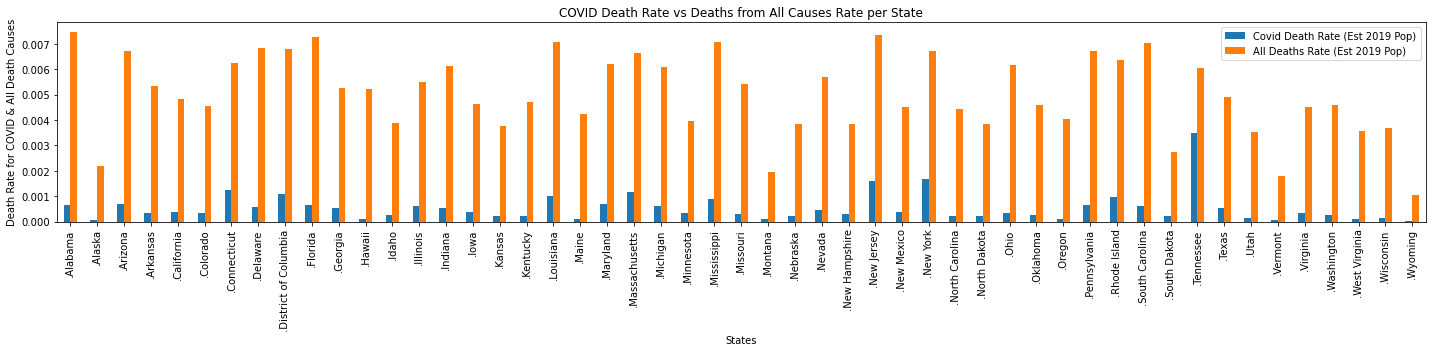

In [22]:
# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = df3.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(cdc_read["State"], rotation=90)

plt.title('COVID Death Rate vs Deaths from All Causes Rate per State')
plt.xlabel('States')
plt.ylabel('Death Rate for COVID & All Death Causes')
plt.tight_layout()
plt.savefig("Death Rate for COVID & All Causes of Death per State Bar.png")
plt.show()

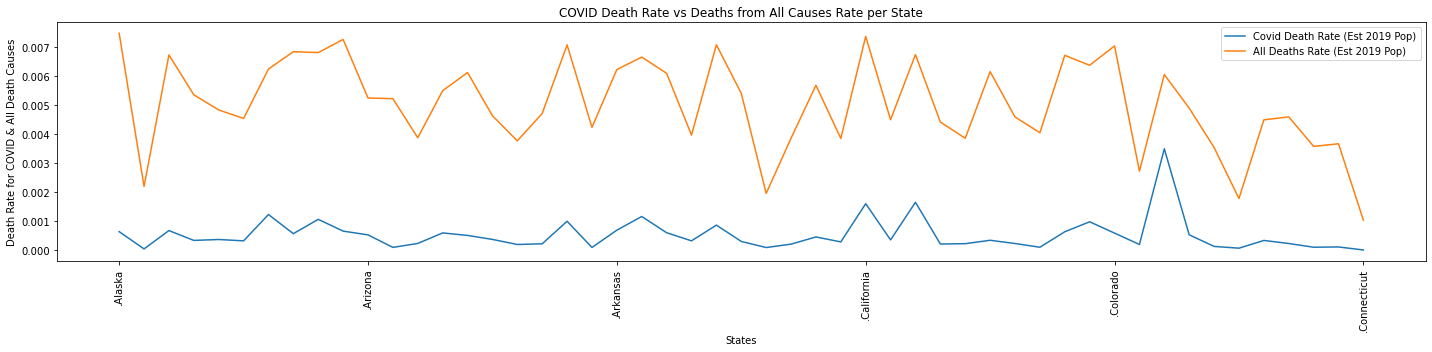

In [23]:
multi_plot = df3.plot(kind="line", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(cdc_read["State"], rotation=90)

plt.title('COVID Death Rate vs Deaths from All Causes Rate per State')
plt.xlabel('States')
plt.ylabel('Death Rate for COVID & All Death Causes')
plt.tight_layout()
plt.savefig("Death Rate for COVID & All Causes of Death per State Line.png")
plt.show()

In [24]:
f3 = cdc_read[["State","Covid Death Rate (Est 2019 Pop)","All Deaths Rate (Est 2019 Pop)", "All Deaths Except Covid Death Rate (Est 2019 Pop)"]]

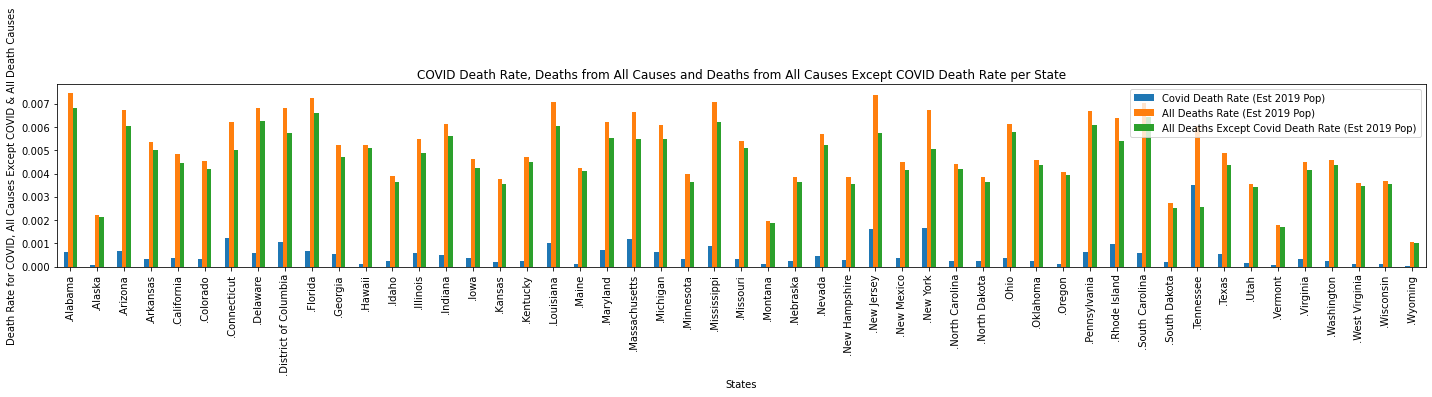

In [26]:
# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = f3.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(cdc_read["State"], rotation=90)

plt.title('COVID Death Rate, Deaths from All Causes and Deaths from All Causes Except COVID Death Rate per State')
plt.xlabel('States')
plt.ylabel('Death Rate for COVID, All Causes Except COVID & All Death Causes')
plt.tight_layout()
# plt.savefig("Death Rate for COVID, All Causes Except COVID & All Causes of Death per State Bar.png")
plt.show()